In [1]:
!nvidia-smi

Thu Aug 15 09:58:10 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   49C    P8              11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 33.6/78.2 GB disk)


In [3]:
from ultralytics import YOLO
from IPython.display import display, Image
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
!yolo task=detect mode=train model=yolov8s.pt data=/content/drive/MyDrive/person_dataset/data.yaml epochs=50 imgsz=640 batch=16 plots=True

New https://pypi.org/project/ultralytics/8.2.77 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/drive/MyDrive/person_dataset/data.yaml, epochs=50, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=Fals

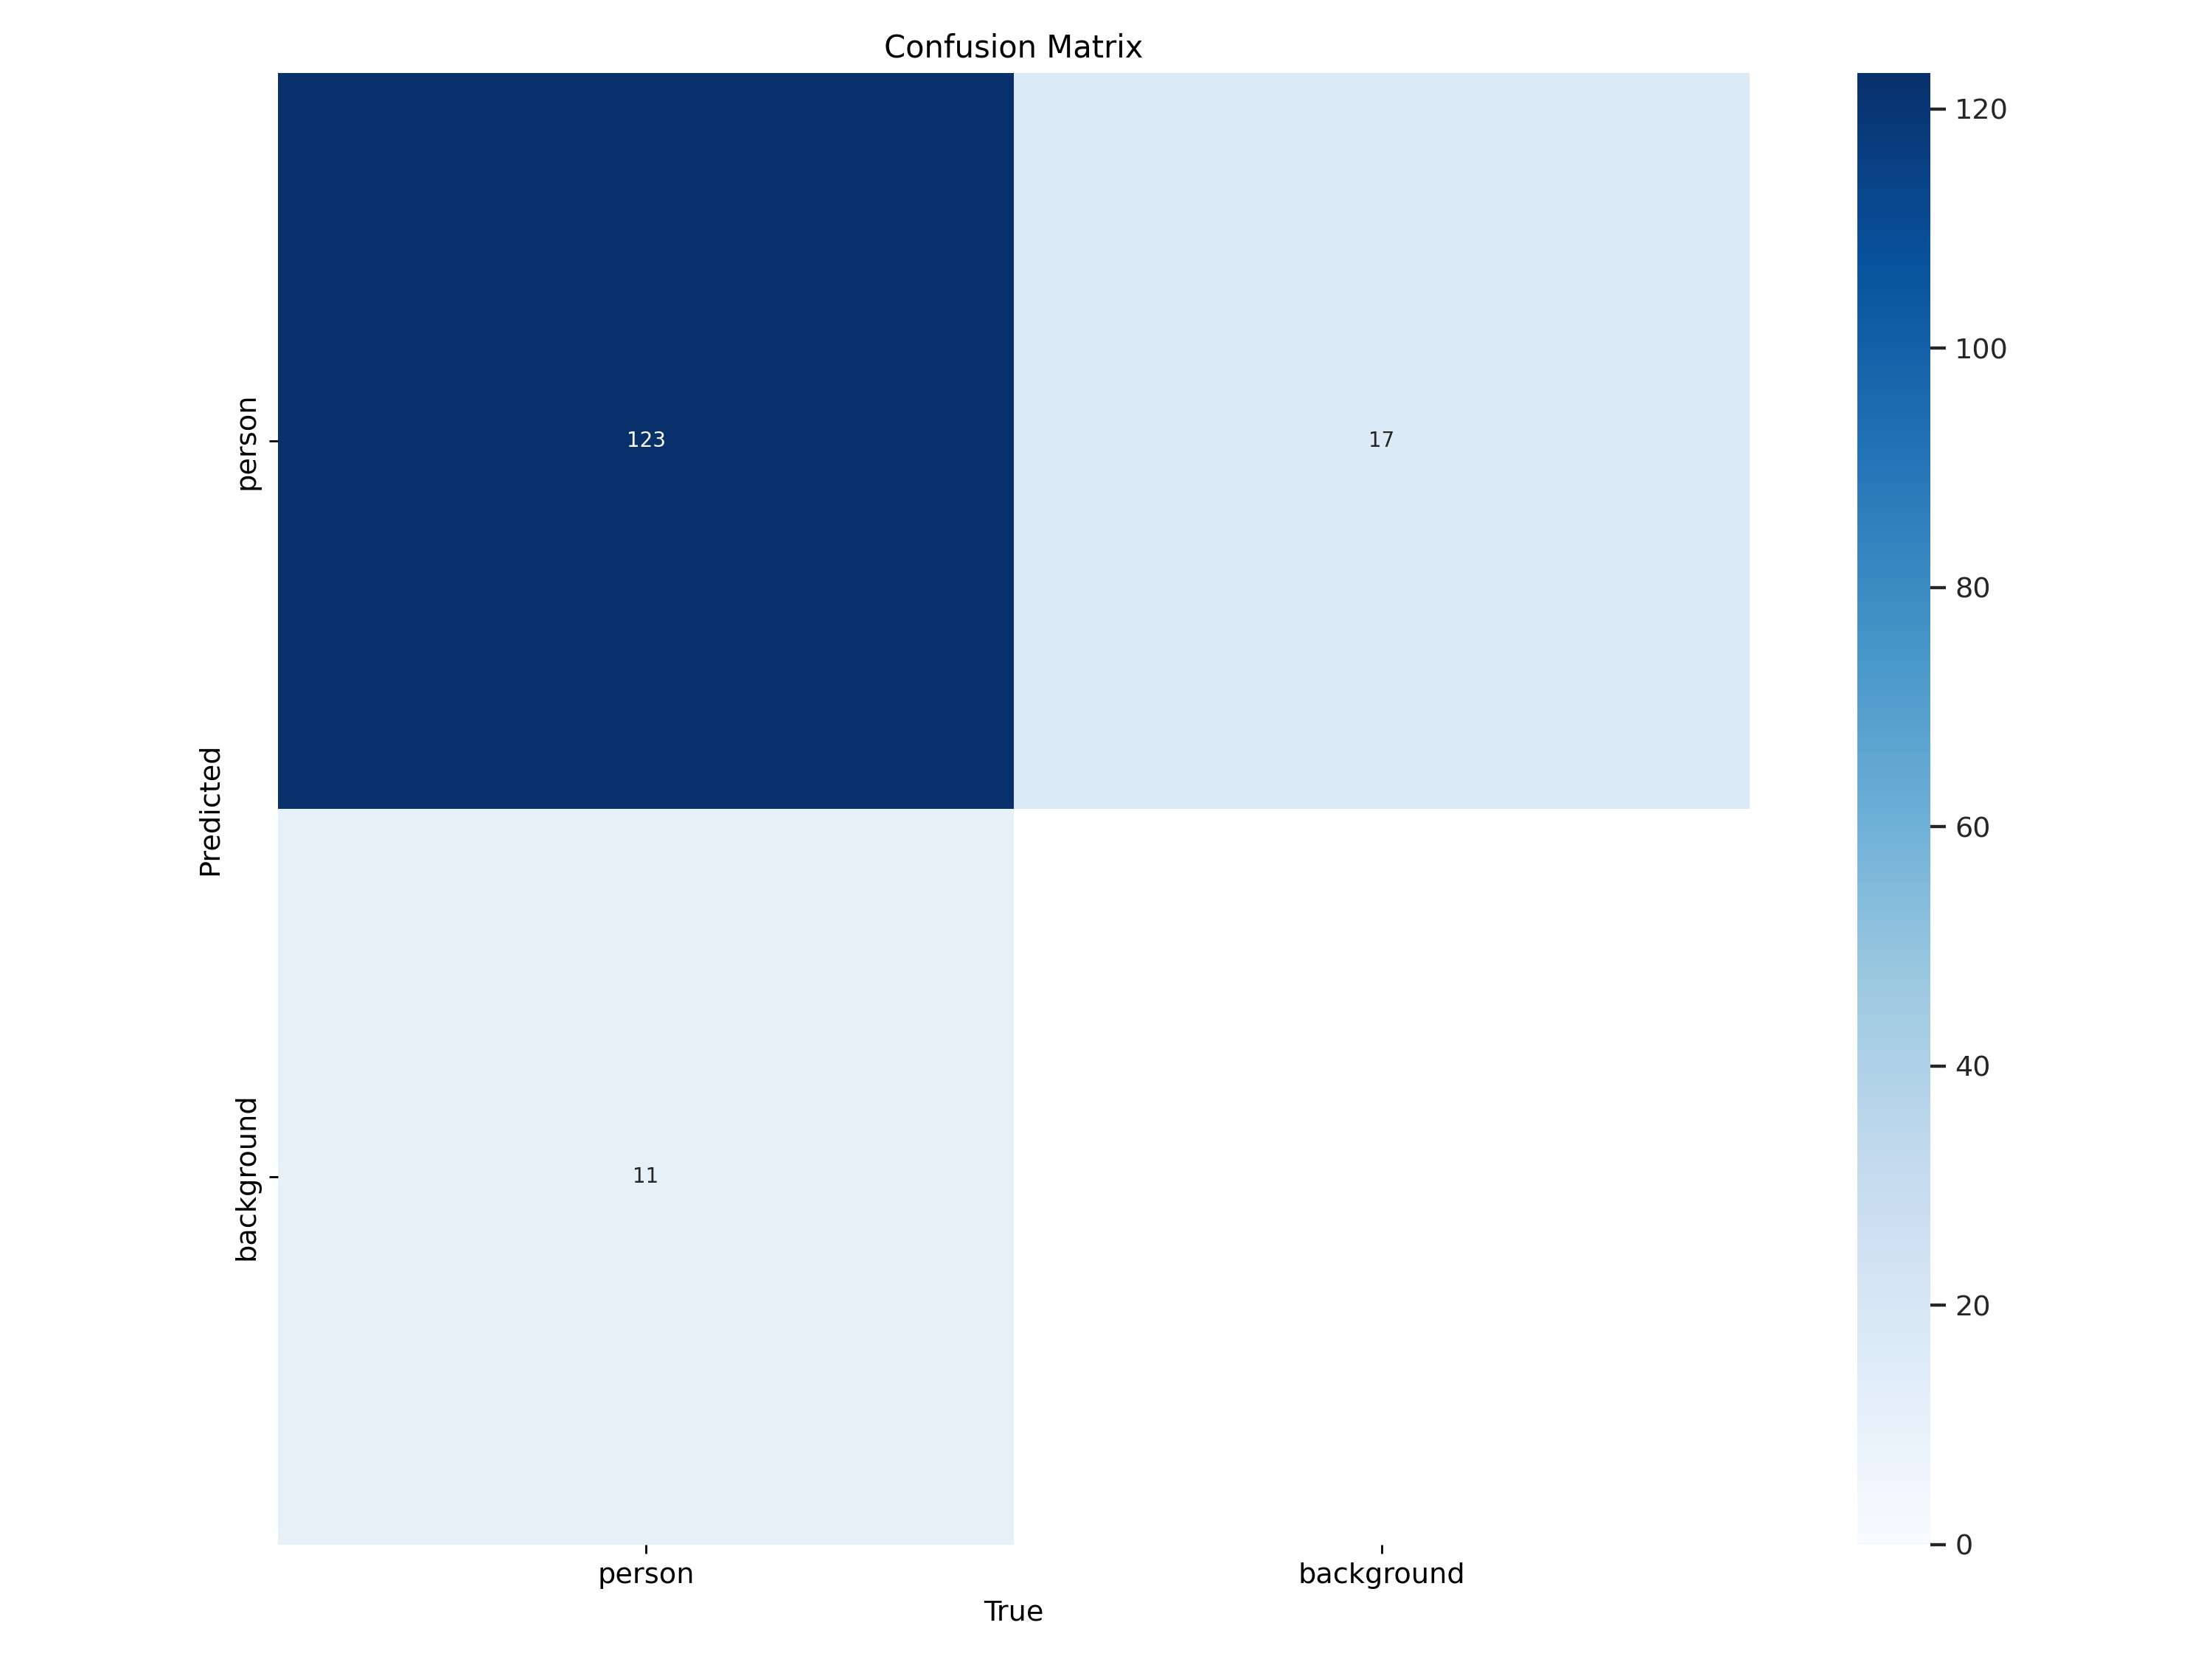

In [8]:
Image(filename=f'/content/runs/detect/train2/confusion_matrix.png', width=600)

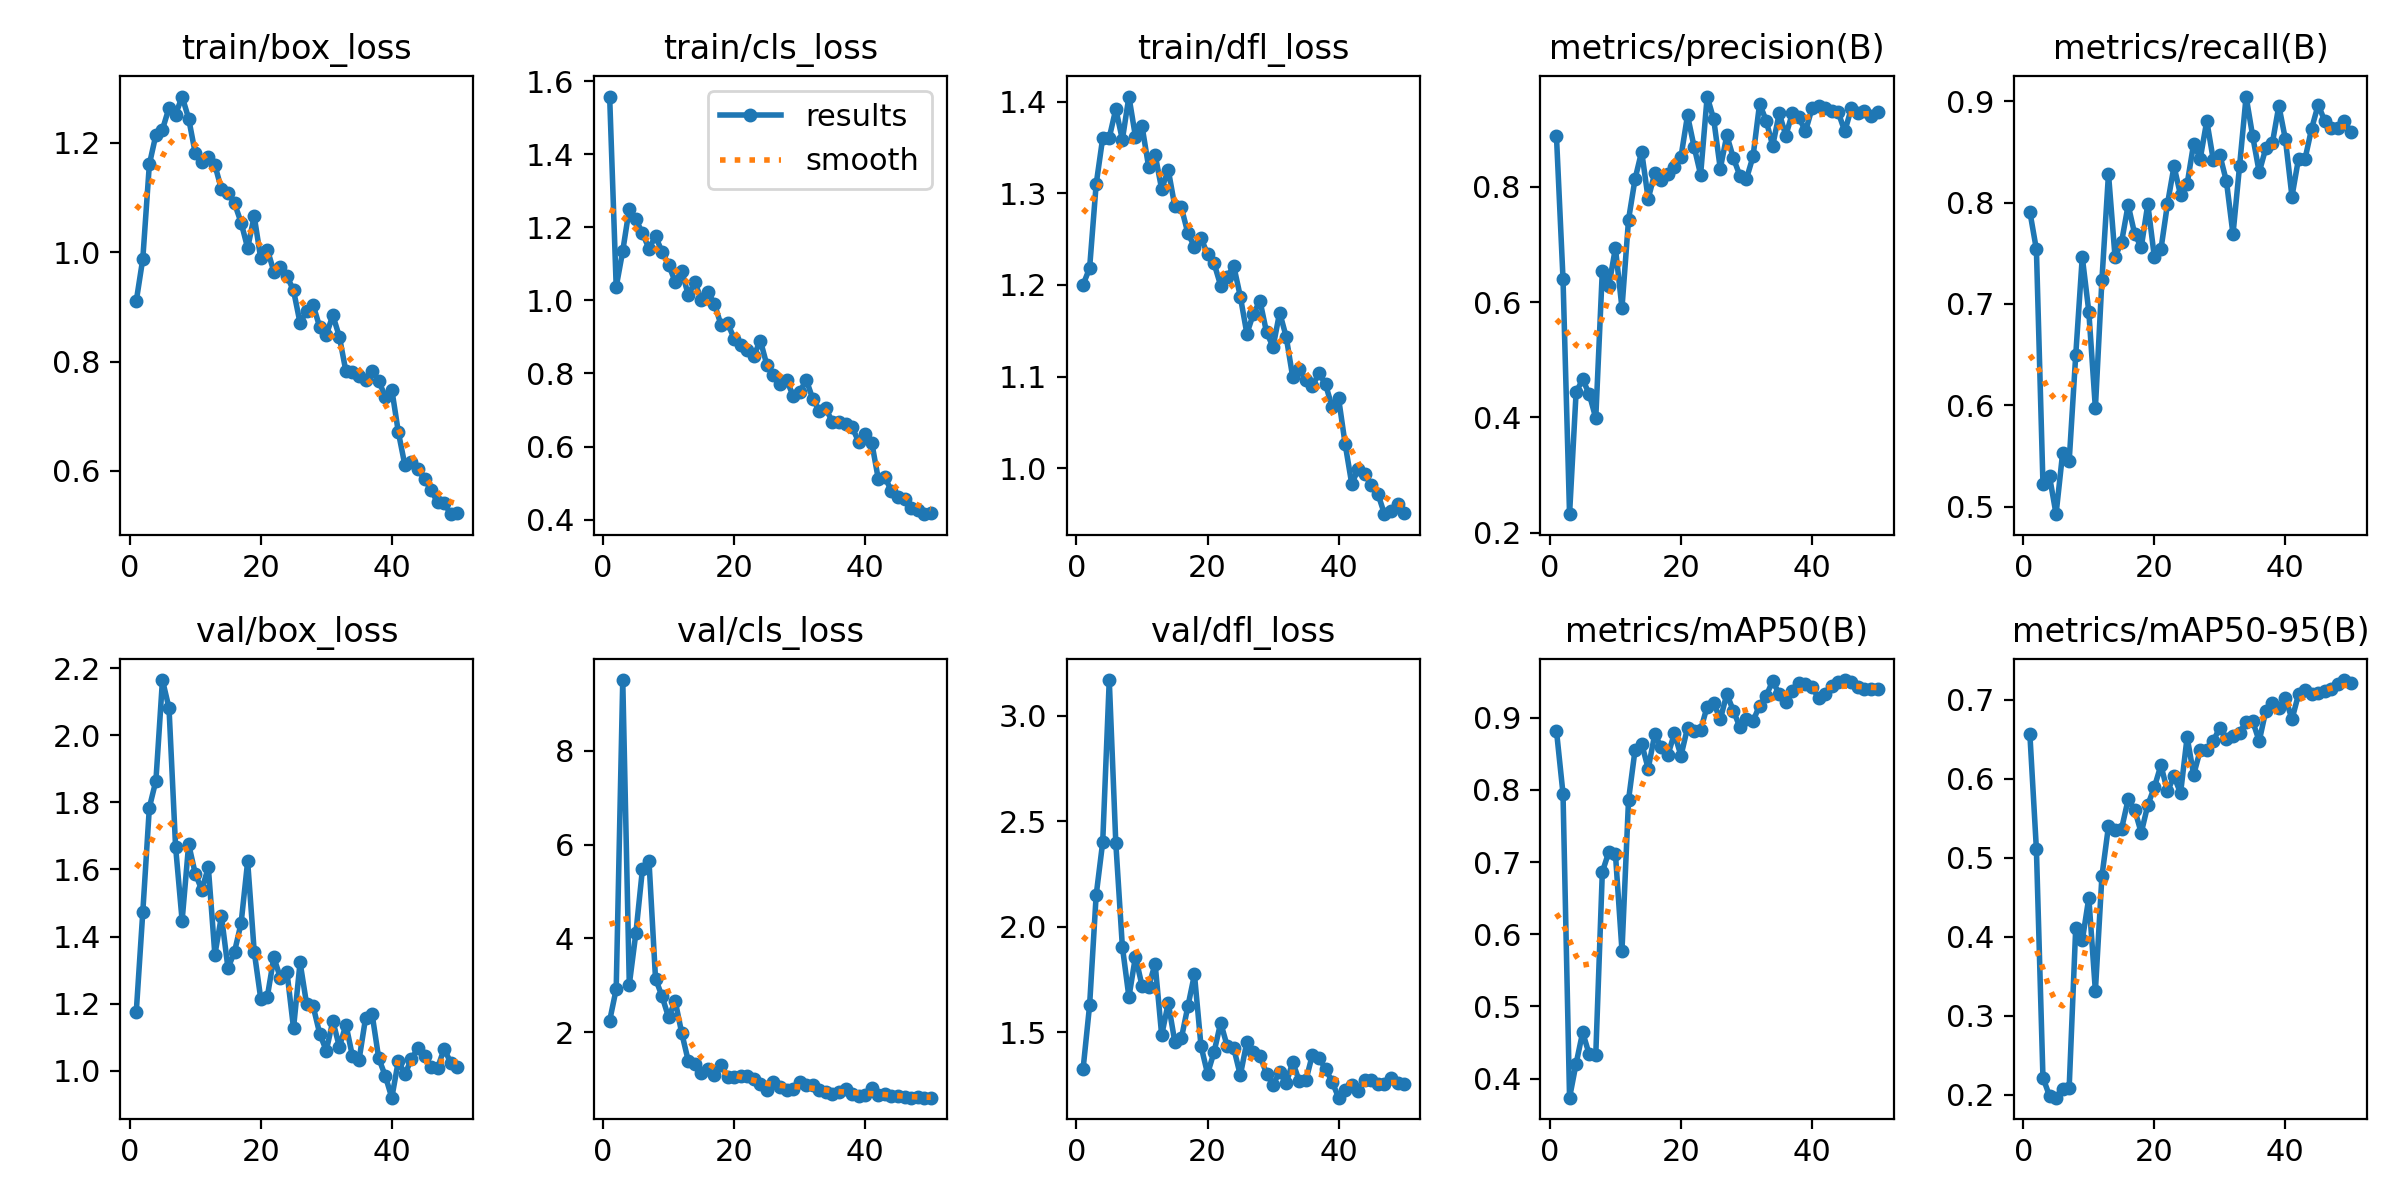

In [9]:
Image(filename=f'/content/runs/detect/train2/results.png', width=600)

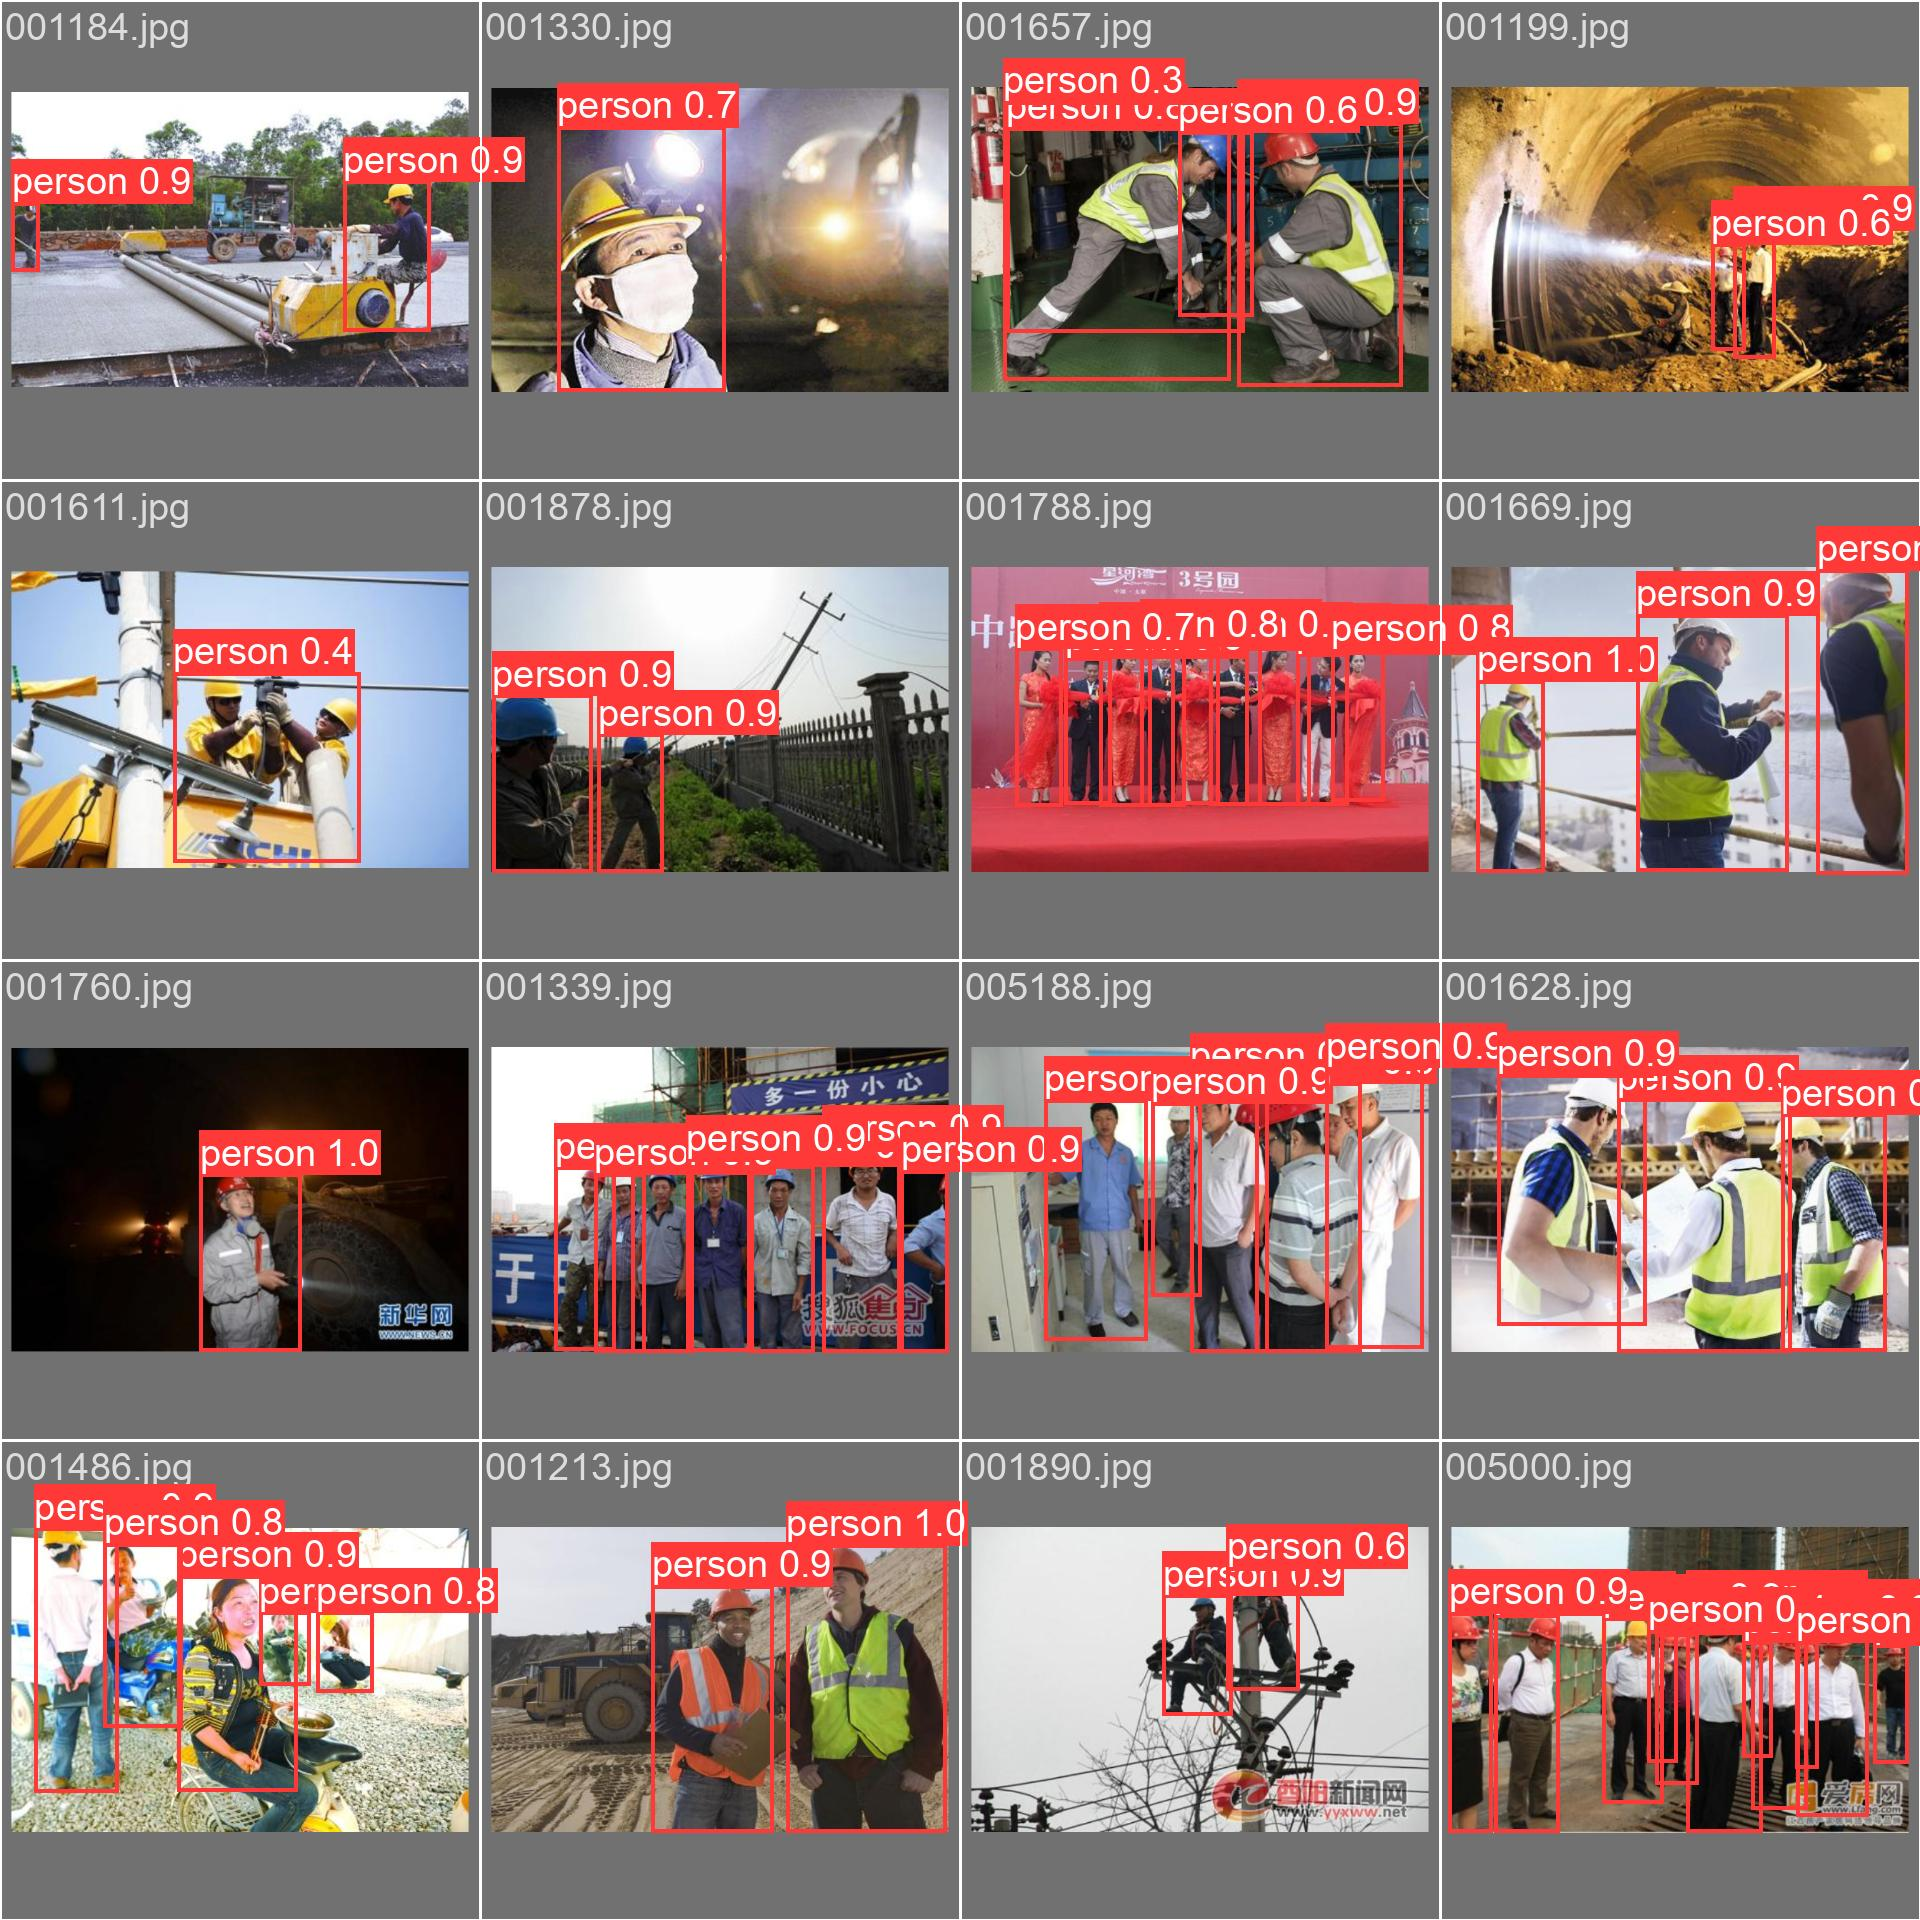

In [10]:
Image(filename=f'/content/runs/detect/train2/val_batch0_pred.jpg', width=600)

In [12]:
!yolo task=detect mode=val model=/content/runs/detect/train2/weights/best.pt data=/content/drive/MyDrive/person_dataset/data.yaml

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/drive/MyDrive/person_dataset/valid/labels.cache... 41 images, 0 backgrounds, 0 corrupt: 100% 41/41 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 3/3 [00:03<00:00,  1.26s/it]
                   all         41        134      0.907      0.876      0.937      0.726
Speed: 0.3ms preprocess, 42.2ms inference, 0.0ms loss, 32.6ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


In [13]:
!yolo task=detect mode=predict model=/content/runs/detect/train2/weights/best.pt conf=0.25 source=/content/drive/MyDrive/person_dataset/test/images save=True

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/43 /content/drive/MyDrive/person_dataset/test/images/-1832-_png_jpg.rf.d56cb4edba4c059bdfa7f2c581d26a19.jpg: 640x640 6 persons, 16.4ms
image 2/43 /content/drive/MyDrive/person_dataset/test/images/-2082-_png_jpg.rf.7b89e77b67643cd28c0ce52ed7e588e3.jpg: 640x640 3 persons, 16.4ms
image 3/43 /content/drive/MyDrive/person_dataset/test/images/001037.jpg: 544x640 3 persons, 121.8ms
image 4/43 /content/drive/MyDrive/person_dataset/test/images/001038.jpg: 480x640 3 persons, 75.5ms
image 5/43 /content/drive/MyDrive/person_dataset/test/images/001059.jpg: 640x448 3 persons, 69.8ms
image 6/43 /content/drive/MyDrive/person_dataset/test/images/001183.jpg: 480x640 6 persons, 13.8ms
image 7/43 /content/drive/MyDrive/person_dataset/test/images/001190.jpg: 448x640 1 person, 66.9ms
image 8

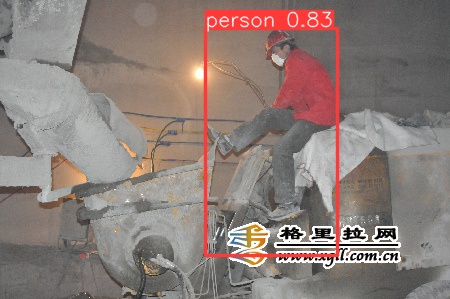

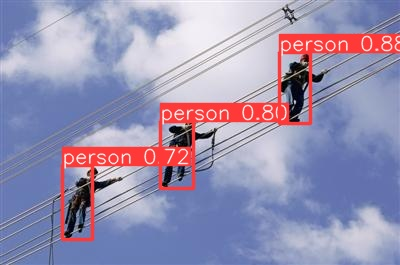

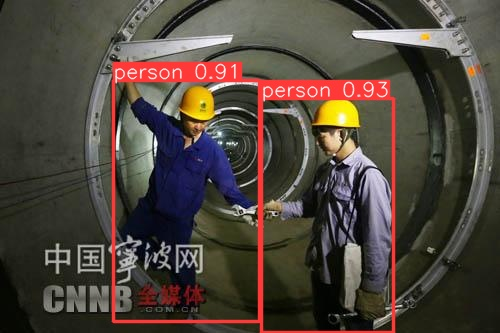

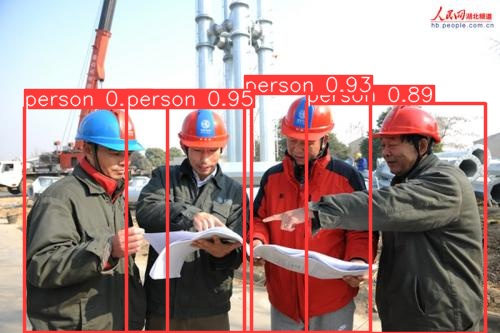

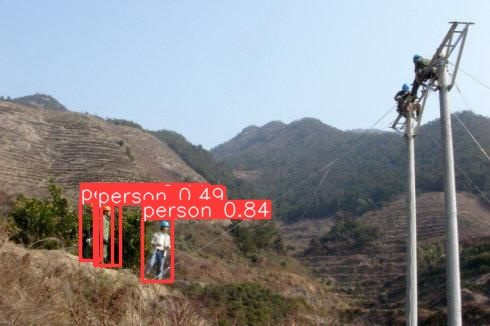

In [14]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'/content/runs/detect/predict/*.jpg')[:5]:
      display(Image(filename=image_path, width=600))
      print("\n")